In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


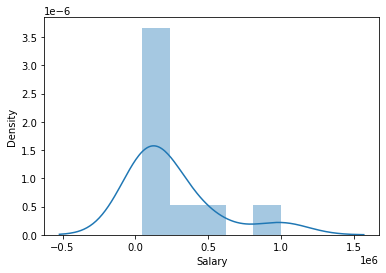

In [5]:
sns.distplot(df['Salary'])
plt.show()

## Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df['Position'] = le.fit_transform(df['Position'])

## Split test and Train

In [9]:
X=df.iloc[:,1:2]
y=df.iloc[:,-1]

In [10]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [11]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

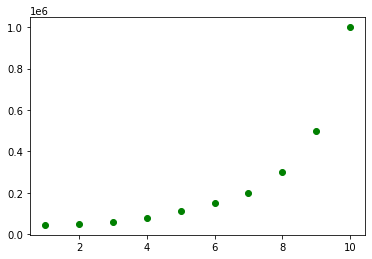

In [12]:
plt.scatter(X,y,color='Green')
plt.show()

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X,y)
y_pred=lr.predict(X)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    print(f"R2-Score :- {round(r2,2)}\nRMSE :- {round(rmse,2)}")
    

model_performance(y,y_pred)

R2-Score :- 0.67
RMSE :- 163388.74


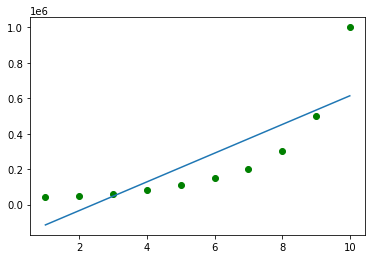

In [17]:
plt.scatter(X,y,color='Green')
plt.plot(X,y_pred)
plt.show()

## Polynomial linear regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
pf = PolynomialFeatures(degree=2)

In [20]:
X_poly=pf.fit_transform(X)

In [21]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [22]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly,y)
y_pred_poly=lr_poly.predict(X_poly)

In [23]:
model_performance(y,y_pred_poly)

R2-Score :- 0.92
RMSE :- 82212.12


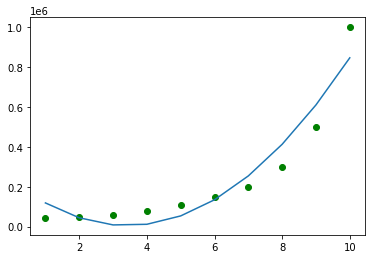

In [24]:
plt.scatter(X,y,color='Green')
plt.plot(X,y_pred_poly)
plt.show()

In [25]:
pf3 = PolynomialFeatures(degree=3)
X_poly=pf3.fit_transform(X)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_poly,y)
y_pred_poly3=lr_poly3.predict(X_poly)

In [26]:
model_performance(y,y_pred_poly3)

R2-Score :- 0.98
RMSE :- 38931.5


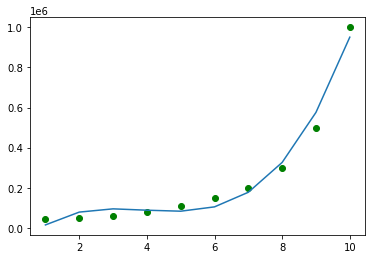

In [27]:
plt.scatter(X,y,color='Green')
plt.plot(X,y_pred_poly3)
plt.show()

## predict salary of emp as per level - both regression

In [28]:
#assume level 5.5 in linear
lr.predict([[5.5]])

array([249500.])

In [29]:
#assume level 25 in linear
lr.predict([[25]])

array([1826636.36363636])

### polynomial regression

#### degree 2

In [30]:
#assume level 5.5 in polynomial regression while degree 2
lr_poly.predict(pf.fit_transform([[5.5]]))

array([89187.5])

In [31]:
#assume level 25 in polynomial regression while degree 2
lr_poly.predict(pf.fit_transform([[25]]))

array([9055272.72727272])

#### degree 3

In [32]:
#assume level 5.5 in polynomial regression while degree 3
lr_poly3.predict(pf3.fit_transform([[5.5]]))

array([89187.5])

In [33]:
#assume level 25 in polynomial regression while degree 3
lr_poly3.predict(pf3.fit_transform([[25]]))

array([38427909.09090696])